In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
import scipy
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_92417/2491741907.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:
######################
####  W A C C M  #####
######################

In [3]:

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


#run_name = 'Jianfei_run'
run_name = 'Wuhu_IonTr_run'
#run_name = 'Wuhu_IonTr_run_No_glbavg'

win_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{win_Monthfolderstr}.nc'
spr_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{spr_Monthfolderstr}.nc'
sum_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{sum_Monthfolderstr}.nc'
aut_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{aut_Monthfolderstr}.nc'

ds_months_ar = np.arange(0,3)   

ds_win = xr.open_dataset(win_file)
ds_spr = xr.open_dataset(spr_file)
ds_sum = xr.open_dataset(sum_file)
ds_aut = xr.open_dataset(aut_file)

ds_sum

<xarray.Dataset>
Dimensions:                   (lev_sl: 25, time: 336, lat: 96, latsl: 36,
                               lon: 144, LT: 48, timesl: 2, mth: 3)
Coordinates:
  * lev_sl                    (lev_sl) float64 1.473e-05 1.891e-05 ... 0.00601
  * time                      (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                       (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                     (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                       (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                        (LT) float64 0.0 0.5106 1.021 ... 22.98 23.49 24.0
  * timesl                    (timesl) float64 0.0 1.0
  * mth                       (mth) float64 6.0 7.0 8.0
Data variables: (12/16)
    Zavg_sl                   (lev_sl) float64 ...
    times_str_min             (mth, timesl) object ...
    times_str_max             (mth, timesl) object ...
    SpEs_Occ_Fr_b_dsavglevLT  (lat) float64 ...
    SpEs_Occ_Fr_b_dsavglev    (lat, LT) float64 ...
    SpEs_Occ_Fr_b_avglev      (lat, LT, mth) float64 ...
    ...                        ...
    SpEs_Occ_Fr_bb_5d_dsavg   (lev_sl, latsl, LT) float64 ...
    SpEs_Occ_Fr_bb_5d_avg     (lev_sl, latsl, LT, mth) float64 ...
    SpEsns_Occ_Fr_dsavglev    (lat, lon) float64 ...
    SpEsns_Occ_Fr_avglev      (lat, lon, mth) float64 ...
    SpEsns_Occ_Fr_dsavg       (lev_sl, lat, lon) float64 ...
    SpEsns_Occ_Fr_avg         (lev_sl, lat, lon, mth) float64 ...

In [4]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']

Zavg_sl = ds_win.variables['Zavg_sl']
times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglevLT = ds_win.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglev = ds_win.variables['SpEs_Occ_Fr_b_dsavglev']
win_SpEs_Occ_Fr_b_avglev = ds_win.variables['SpEs_Occ_Fr_b_avglev']
# LAT only ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_ds_lat = win_SpEs_Occ_Fr_b_dsavglev.mean(dim='LT')
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']
win_SpEs_Occ_Fr_b_avg = ds_win.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']
win_SpEs_Occ_Fr_b_avgLT = ds_win.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']
win_SpEs_Occ_Fr_bb_5d_avg = ds_win.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavglev = ds_win.variables['SpEsns_Occ_Fr_dsavglev']
win_SpEsns_Occ_Fr_avglev = ds_win.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']
win_SpEsns_Occ_Fr_avg = ds_win.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S P R I N G # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglevLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglev = ds_spr.variables['SpEs_Occ_Fr_b_dsavglev']
spr_SpEs_Occ_Fr_b_avglev = ds_spr.variables['SpEs_Occ_Fr_b_avglev']
# LAT only ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_ds_lat = spr_SpEs_Occ_Fr_b_dsavglev.mean(dim='LT')
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']
spr_SpEs_Occ_Fr_b_avg = ds_spr.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']
spr_SpEs_Occ_Fr_b_avgLT = ds_spr.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']
spr_SpEs_Occ_Fr_bb_5d_avg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavglev = ds_spr.variables['SpEsns_Occ_Fr_dsavglev']
spr_SpEsns_Occ_Fr_avglev = ds_spr.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']
spr_SpEsns_Occ_Fr_avg = ds_spr.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S U M M E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglevLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglev = ds_sum.variables['SpEs_Occ_Fr_b_dsavglev']
sum_SpEs_Occ_Fr_b_avglev = ds_sum.variables['SpEs_Occ_Fr_b_avglev']
# LAT only ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_ds_lat = sum_SpEs_Occ_Fr_b_dsavglev.mean(dim='LT')
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']
sum_SpEs_Occ_Fr_b_avg = ds_sum.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']
sum_SpEs_Occ_Fr_b_avgLT = ds_sum.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']
sum_SpEs_Occ_Fr_bb_5d_avg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavglev = ds_sum.variables['SpEsns_Occ_Fr_dsavglev']
sum_SpEsns_Occ_Fr_avglev = ds_sum.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']
sum_SpEsns_Occ_Fr_avg = ds_sum.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # A U T U M N # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglevLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglev = ds_aut.variables['SpEs_Occ_Fr_b_dsavglev']
aut_SpEs_Occ_Fr_b_avglev = ds_aut.variables['SpEs_Occ_Fr_b_avglev']
# LAT only ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_ds_lat = aut_SpEs_Occ_Fr_b_dsavglev.mean(dim='LT')
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']
aut_SpEs_Occ_Fr_b_avg = ds_aut.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']
aut_SpEs_Occ_Fr_b_avgLT = ds_aut.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']
aut_SpEs_Occ_Fr_bb_5d_avg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavglev = ds_aut.variables['SpEsns_Occ_Fr_dsavglev']
aut_SpEsns_Occ_Fr_avglev = ds_aut.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']
aut_SpEsns_Occ_Fr_avg = ds_aut.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

In [5]:
###############################
####  MAG LAT & LON DATA  #####
###############################

In [6]:
file1name='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-03-*.nc'
ds = xr.open_mfdataset(file1name)
ds

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 744, mlat: 97, mlon: 80, lev: 126,
                   ilev: 127, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * mlat          (mlat) float64 -90.0 -88.12 -86.24 -84.33 ... 86.24 88.12 90.0
  * mlon          (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * lev           (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev          (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time          (time) object 0001-03-01 00:00:00 ... 0001-03-31 23:00:00
Dimensions without coordinates: nbnd
Data variables: (12/113)
    gw            (time, lat) float64 dask.array<chunksize=(24, 96), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    ...            ...
    UI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    V             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    VI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    WI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    Z3            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    e             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport
    logname:           earfw
    host:              d13s7b3.arc4.lee
    initial_file:      /nobackup/earfw/cesm2/cases/ACP_CESM213_FX2000_f19_f19...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

In [7]:
ALATM = ds['ALATM']     #time,lat,lon
ALONM = ds['ALONM']     #time,lat,lon

#ALATM.shape   #(744, 96, 144)

avALATM = np.mean(ALATM, axis=0)   # Average over time dimension -> [lat,lon]


#avALATM.shape   #(96,144)

In [23]:
lat_min = -60  # Replace with your minimum latitude
lat_max = 60   # Replace with your maximum latitude

spr_SpEsns_Occ_Fr_dsavglev_latsl = ds_spr['SpEsns_Occ_Fr_dsavglev'].sel(lat=slice(lat_min, lat_max))
ALATM_latsl = avALATM.sel(lat=slice(lat_min, lat_max))

latsl = ds_spr['lat'].sel(lat=slice(lat_min, lat_max))
nlat = len(latsl)
nlats = np.arange(0,nlat)

nlons = np.arange(0,144)
n = np.zeros((nlat, 144 ))

for ilat in nlats:
    for ilon in nlons:
        fp = spr_SpEsns_Occ_Fr_dsavglev_latsl[:, ilon] # y-coordinates of the data points, same length as xp
        xp = ALATM_latsl[:, ilon].values   #known x-coordinates of the data points
        x = latsl[ilat]   #value to calculate at / where you want to find the interpolated values
        n[ilat,ilon] = np.interp(x,xp,fp)   # occ freq (fp) at geomag lat 'x' 
        #print(n[ilat,ilon])
    
    
    


In [16]:
# Convert the Variable to DataArray
data_array = xr.DataArray(spr_SpEsns_Occ_Fr_dsavglev, coords= {'lat': lat, 'lon': lon} )

# Interpolate 'SpEs_Occ_Fr_b_dsavglev' to magnetic latitude and longitude
interpolated_data = data_array.interp(lat=avALATM, lon=avALONMshh)

In [ ]:
#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////

In [38]:
ds_mlat = ds['mlat']
ds_mlon = ds['mlon'] #-180 - 180

ds_mlonsh = ds_mlon.roll(mlon=144// 2)#, roll_coords=True)
ds_mlonshh = (ds_mlonsh + 180) % 360     #-180 - 180 to 0-360

In [39]:
# Convert the Variable to DataArray
data_array = xr.DataArray(spr_SpEsns_Occ_Fr_dsavglev, coords= {'lat': lat, 'lon': lon} )

# Interpolate 'SpEs_Occ_Fr_b_dsavglev' to magnetic latitude and longitude
interpolated_data_2 = data_array.interp(lat=ds_mlat, lon=ds_mlonshh)

In [40]:
mlat = interpolated_data_2['lat']
mlon = interpolated_data_2['lon']

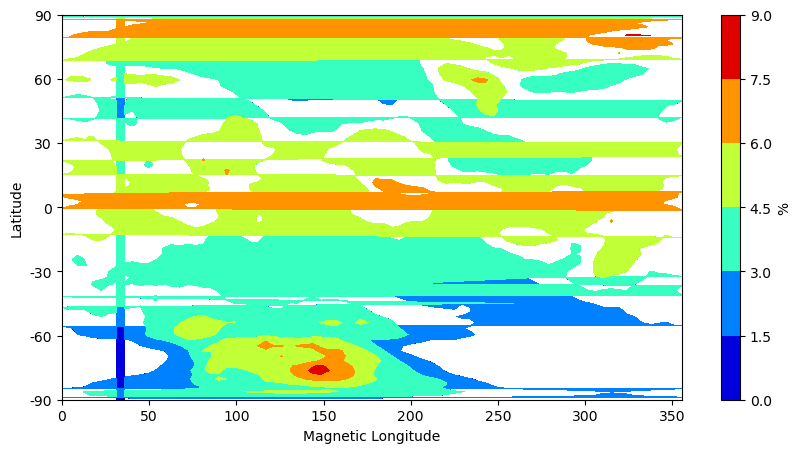

In [41]:

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('jet')

C = ax.contourf(#mlonsh_plot, mlat, interpolated_data_plot
                mlon, mlat, interpolated_data_2
                , cmap=cmap
                #,levels=np.linspace(vminw, vmaxw, 11), vmin=vminw, vmax=vmaxw
               )

ax.set_xlabel('Magnetic Longitude')
ax.set_ylabel('Latitude')
#ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])#, crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

cbar = fig.colorbar(C, ax=ax)#, pad=0.04, shrink=0.8)
cbar.set_label(r'%') 


plt.show()

In [ ]:
#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////

In [19]:
mlat = interpolated_data['lat']
mlon = interpolated_data['lon']   #0-357.5

#mlon

In [25]:
mlat.values

array([-90.        , -88.10526316, -86.21052632, -84.31578947,
       -82.42105263, -80.52631579, -78.63157895, -76.73684211,
       -74.84210526, -72.94736842, -71.05263158, -69.15789474,
       -67.26315789, -65.36842105, -63.47368421, -61.57894737,
       -59.68421053, -57.78947368, -55.89473684, -54.        ,
       -52.10526316, -50.21052632, -48.31578947, -46.42105263,
       -44.52631579, -42.63157895, -40.73684211, -38.84210526,
       -36.94736842, -35.05263158, -33.15789474, -31.26315789,
       -29.36842105, -27.47368421, -25.57894737, -23.68421053,
       -21.78947368, -19.89473684, -18.        , -16.10526316,
       -14.21052632, -12.31578947, -10.42105263,  -8.52631579,
        -6.63157895,  -4.73684211,  -2.84210526,  -0.94736842,
         0.94736842,   2.84210526,   4.73684211,   6.63157895,
         8.52631579,  10.42105263,  12.31578947,  14.21052632,
        16.10526316,  18.        ,  19.89473684,  21.78947368,
        23.68421053,  25.57894737,  27.47368421,  29.36

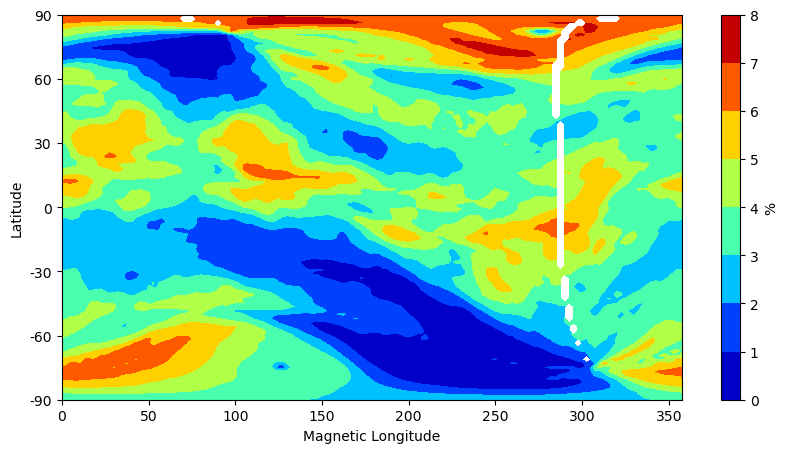

In [20]:



fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('jet')

C = ax.contourf(#mlonsh_plot, mlat, interpolated_data_plot
                mlon, mlat, interpolated_data
                , cmap=cmap
                #,levels=np.linspace(vminw, vmaxw, 11), vmin=vminw, vmax=vmaxw
               )

ax.set_xlabel('Magnetic Longitude')
ax.set_ylabel('Latitude')
#ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])#, crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

cbar = fig.colorbar(C, ax=ax)#, pad=0.04, shrink=0.8)
cbar.set_label(r'%') 


plt.show()

In [42]:
# # Roll the data along the longitude dimension
# #spr_SpEsns_Occ_Fr_dsavglevsh = np.roll(spr_SpEsns_Occ_Fr_dsavglev.values, shift=144//2, axis=-1)

# lonsh = (lon + 180) % 360 - 180    #0-360 to -180 - 180
# lonsh

<xarray.Variable (lon: 144)>
array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
         20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
         40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
         60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
         80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
        100. ,  102.5,  105. ,  107.5,  110. ,  112.5,  115. ,  117.5,
        120. ,  122.5,  125. ,  127.5,  130. ,  132.5,  135. ,  137.5,
        140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,  157.5,
        160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5,
       -180. , -177.5, -175. , -172.5, -170. , -167.5, -165. , -162.5,
       -160. , -157.5, -155. , -152.5, -150. , -147.5, -145. , -142.5,
       -140. , -137.5, -135. , -132.5, -130. , -127.5, -125. , -122.5,
       -120. , -117.5, -115. , -112.5, -110. , -107.5, -105. , -102.5,
       -100. ,  -97.5,  -95. ,  -92.5,  -90. ,  -87.5,  -85. ,  -82.5,
        -80. ,  -77.5,  -75. ,  -72.5,  -70. ,  -67.5,  -65. ,  -62.5,
        -60. ,  -57.5,  -55. ,  -52.5,  -50. ,  -47.5,  -45. ,  -42.5,
        -40. ,  -37.5,  -35. ,  -32.5,  -30. ,  -27.5,  -25. ,  -22.5,
        -20. ,  -17.5,  -15. ,  -12.5,  -10. ,   -7.5,   -5. ,   -2.5])

In [47]:
# # Convert the Variable to DataArray
# data_array = xr.DataArray(spr_SpEsns_Occ_Fr_dsavglev, coords= {'lat': lat, 'lon': lonsh} )

# # Interpolate 'SpEs_Occ_Fr_b_dsavglev' to magnetic latitude and longitude
# interpolated_data = data_array.interp(lat=avALATM, lon=avALONM)

In [22]:
# #Append additional values at the end of the array to fill in gaps in data at lon 360

# # lon.values.min() #0.0
# # lon.values.max() #357.5

# lon_ex = np.append(lon, 360)
# lon_ex.shape #145


# spr_SpEsns_Occ_Fr_dsavglev_np = spr_SpEsns_Occ_Fr_dsavglev.values
# spr_SpEsns_Occ_Fr_dsavglev_np_ex = np.column_stack([spr_SpEsns_Occ_Fr_dsavglev_np, spr_SpEsns_Occ_Fr_dsavglev_np[:, 0]])
# spr_SpEsns_Occ_Fr_dsavglev_np_ex.shape #96,145

In [54]:
#Convert 0-360 to -180 to 180
mlonsh = (mlon + 180) % 360 - 180
mlonsh

<xarray.DataArray 'lon' (lon: 144)>
array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
         20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
         40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
         60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
         80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
        100. ,  102.5,  105. ,  107.5,  110. ,  112.5,  115. ,  117.5,
        120. ,  122.5,  125. ,  127.5,  130. ,  132.5,  135. ,  137.5,
        140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,  157.5,
        160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5,
       -180. , -177.5, -175. , -172.5, -170. , -167.5, -165. , -162.5,
       -160. , -157.5, -155. , -152.5, -150. , -147.5, -145. , -142.5,
       -140. , -137.5, -135. , -132.5, -130. , -127.5, -125. , -122.5,
       -120. , -117.5, -115. , -112.5, -110. , -107.5, -105. , -102.5,
       -100. ,  -97.5,  -95. ,  -92.5,  -90. ,  -87.5,  -85. ,  -82.5,
        -80. ,  -77.5,  -75. ,  -72.5,  -70. ,  -67.5,  -65. ,  -62.5,
        -60. ,  -57.5,  -55. ,  -52.5,  -50. ,  -47.5,  -45. ,  -42.5,
        -40. ,  -37.5,  -35. ,  -32.5,  -30. ,  -27.5,  -25. ,  -22.5,
        -20. ,  -17.5,  -15. ,  -12.5,  -10. ,   -7.5,   -5. ,   -2.5])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [65]:
interpolated_data_ass = interpolated_data.assign_coords(lon=mlonsh.values)
interpolated_data_ass

lonnnn = interpolated_data_ass['lon']
latttt = interpolated_data_ass['lat']

In [24]:

# # Shift the variable along the longitude dimension
# interpolated_data_sh = interpolated_data.roll(lon=len(interpolated_data['lon']) // 2, roll_coords=True)

# # Update the coordinates in the shifted variable
# interpolated_data_sh = interpolated_data_sh.assign_coords(lon=mlonsh)
# #interpolated_data_sh

In [49]:
# interpolated_data_np = interpolated_data.values

# # Roll the NumPy array along the lon dimension
# rolled_data_np = np.roll(interpolated_data_np, shift=len(interpolated_data['lon']) // 2, axis=-1)


In [57]:
# # Convert xarray DataArray to NumPy array
# interpolated_data_np = interpolated_data.values

# # Roll the NumPy array along the lon dimension
# rolled_data_np = np.roll(interpolated_data_np, shift=len(interpolated_data['lon']) // 2, axis=-1)

# # Create a new xarray DataArray with the rolled values
# rolled_data = xr.DataArray(rolled_data_np, coords=interpolated_data.coords, dims=interpolated_data.dims)

# # Update the 'lon' coordinates in the rolled_data variable
# rolled_data = rolled_data.assign_coords(lon=mlonsh)